In [247]:
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
import numpy as np
import copy
import math
%matplotlib inline

In [248]:
class Bouncing_ball:
    
    acceleration=9.8
    timestep=0.1
    
    def __init__(self,v0,theta,height):
        a=Bouncing_ball.acceleration
        self.angle=theta 
        self.height=height
        self.y=height
        self.x=0
        
        self.height_crossed=height
        
        self.t_reach_top=(v0*np.sin(theta * np.pi/180))/a
        self.height_max=self.height+1/2*a*(self.t_reach_top)**2

        self.t_max=math.sqrt(2*self.height_max/9.8)
        self.v_max=self.t_max*9.8

        
        self.current_velocity_x=v0*np.cos(theta * np.pi/180)
        self.previous_velocity_x=v0*np.cos(theta * np.pi/180)
        self.current_velocity_y=-v0*np.sin(theta * np.pi/180)
        self.previous_velocity_y=-v0*np.sin(theta * np.pi/180)
        self.time=0
    
    def advance_step(self,timestep):
        new_velocity_y=0
        a=Bouncing_ball.acceleration
        h=Bouncing_ball.timestep
        v_max=self.v_max
        
        if  self.current_velocity_y < 0  :
            new_velocity_y=self.current_velocity_y+a*h
            self.height_crossed-=self.current_velocity_y*h+0.5*a*(h)**2
            
        elif self.current_velocity_y > 0:
                new_velocity_y=self.current_velocity_y+a*h
                self.height_crossed-=abs(self.current_velocity_y)*h-0.5*a*(h)**2
                if self.y<0:
                    self.height_crossed=0
                    new_velocity_y=-v_max
                    self.current_velocity_y=0
      
        self.previous_velocity_y=self.current_velocity_y
        self.current_velocity_y=new_velocity_y
        self.time+=h
        self.y=self.height_crossed
        
        self.x+=self.current_velocity_x*h+0.5*(a)*h**2
        
        
        return self.current_velocity_y,self.current_velocity_x,self.previous_velocity_y,self.y,self.x,self.time
    
   
    

    

In [249]:
b=Bouncing_ball(112,55,20)
b.height_max,b.height_crossed,b.current_velocity_y,b.v_max
b2=Bouncing_ball(112,60,20)
b3=Bouncing_ball(112,50,22)



In [253]:
X=[]
Y=[]

height=[]

previous_velocity_y_list=[]
previous_velocity_x_list=[]

current_velocity_y_list=[]
current_velocity_x_list=[]

projection_angles=[]

velocity_y=[]
velocity_x=[]
for i in range(500):
    current_velocity_y,current_velocity_x,previous_velocity_y,y,x,time=b.advance_step(0.5)
    
    X.append(x)
    
    Y.append(y)
    height.append(y)
    
    velocity_y.append(current_velocity)
    print("Angle is",180/math.pi* math.atan(current_velocity_y/current_velocity_x))
    
    
X2=[]
Y2=[]
for i in range(500):
    current_velocity2,current_velocity_x2,previous_velocity_y2,y2,x2,time=b2.advance_step(0.5)
    X2.append(x2)
    Y2.append(y2)

    
X3=[]
Y3=[]
for i in range(500):
    current_velocity3,current_velocity_x3,previous_velocity_y3,y3,x3,time=b3.advance_step(0.5)
    X3.append(x3)
    Y3.append(y3)
    
    

Angle is 17.148832467537694
Angle is 17.943432398788815
Angle is 18.730959246948792
Angle is 19.5112135122434
Angle is 20.284010146228933
Angle is 21.049178468938692
Angle is 21.80656203196731
Angle is 22.556018431383155
Angle is 23.297419074514522
Angle is 24.030648904754784
Angle is 24.75560608857806
Angle is 25.472201668955098
Angle is 26.18035918931298
Angle is 26.88001429209689
Angle is 27.57111429587258
Angle is 28.25361775475907
Angle is 28.927494003807546
Angle is 29.592722693749106
Angle is 30.24929331832552
Angle is 30.897204737197228
Angle is 31.53646469719632
Angle is 32.16708935446157
Angle is 32.789102799761665
Angle is 33.402536589084086
Angle is 34.00742928134317
Angle is 34.60382598484347
Angle is 35.191777913925456
Angle is 35.77134195702187
Angle is 36.3425802571637
Angle is 36.905559805798575
Angle is 37.46035205061887
Angle is 38.00703251794406
Angle is 38.545680450061795
Angle is 39.07637845780362
Angle is 39.59921218851562
Angle is 40.11427000947932
Angle is 40.6

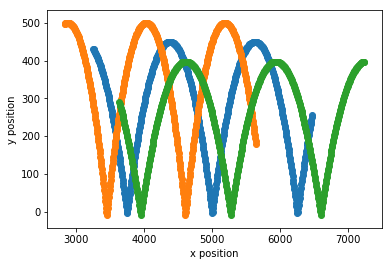

In [254]:
plt.scatter(X,Y)
plt.scatter(X2,Y2)
plt.scatter(X3,Y3)

plt.xlabel('x position')
plt.ylabel('y position')

In [234]:
# Proceed to make a regression model based on NN.
# inputs of NN: (v_n),(height(position_y)),(theta)-> output v_n+1